
Reading list:

* https://www.kaggle.com/bertcarremans/data-preparation-exploration

* https://www.kaggle.com/headsortails/steering-wheel-of-fortune-porto-seguro-eda

* https://www.kaggle.com/arthurtok/interactive-porto-insights-a-plot-ly-tutorial

* https://www.kaggle.com/tilii7/dimensionality-reduction-pca-tsne


# EDA

# Setup and load data from feather file
See `eda.py` to convert `train.csv` to `train.feather`.


In [1]:
%matplotlib inline

# show all values in code, not just the last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import feather
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

train = feather.read_dataframe('data/train.feather')

# Data

In [2]:
train.head()
train.tail()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,708033,0,2,1,6,1,0,0,0,0,...,6,1,3,9,1,1,1,1,0,0
1,1193758,0,7,4,10,1,0,0,0,0,...,4,3,2,4,0,1,1,1,0,1
2,932164,0,2,2,2,0,3,0,0,0,...,7,1,3,9,1,0,1,0,0,1
3,141245,0,1,1,3,1,0,0,0,1,...,2,1,2,5,0,0,1,0,1,0
4,860247,0,1,1,9,0,0,0,1,0,...,5,2,2,8,0,1,1,0,1,0


,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
476164,1476602,0,5,2,3,0,0,0,0,0,...,1,4,4,12,0,1,0,1,1,0
476165,124174,0,4,2,1,0,0,0,0,1,...,8,1,4,10,0,1,0,1,0,1
476166,455903,0,0,2,1,1,0,0,0,1,...,4,2,1,7,0,0,0,0,1,0
476167,693089,0,5,1,7,1,0,0,0,1,...,6,1,6,6,0,0,0,0,1,0
476168,702720,0,1,2,3,0,0,1,0,0,...,2,0,0,8,0,1,1,0,0,0


# Find missing values
The data description specifies that missing values are represented with -1.

In [3]:
(train == -1).sum()

id                     0
target                 0
ps_ind_01              0
ps_ind_02_cat        164
ps_ind_03              0
ps_ind_04_cat         62
ps_ind_05_cat       4692
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03          86377
ps_car_01_cat         85
ps_car_02_cat          2
ps_car_03_cat     328918
ps_car_04_cat          0
ps_car_05_cat     213260
ps_car_06_cat          0
ps_car_07_cat       9253
ps_car_08_cat          0
ps_car_09_cat        441
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              4
ps_car_12              1
ps_car_13              0
ps_car_14          34137
ps_car_15              0
ps_calc_01             0


# -1 -> NaN replacement

https://www.kaggle.com/arthurtok/interactive-porto-insights-a-plot-ly-tutorial

Replace missing values (-1) with numpy's NaN, and plot them with the missingno package

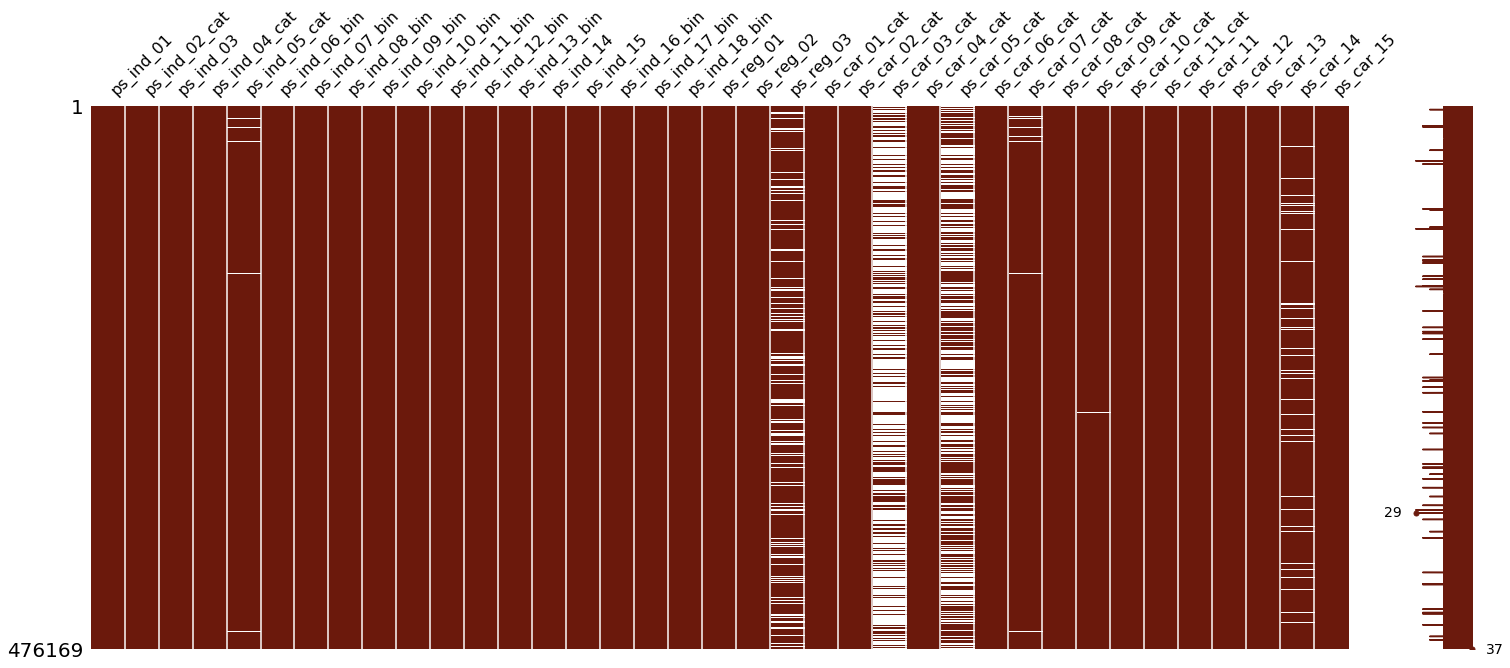

In [4]:
train_nan = train.replace(-1, np.NaN)
import missingno # pip install missingno
missingno.matrix(df=train_nan.iloc[:,2:39], color=(0.42, 0.1, 0.05))

It can be seen that `ps_reg_03` has a fairly large amount of missing values, and`ps_car_03_cat` and `ps_car_05_cat` have a very large amount of missing values.

TODO: figure out what the `[:,2:39]` slice does... ,2 probably selects everything except the id column - what is 39? Also, what are the two columns on the right?

# Find duplicate data
The number of rows is the same before and after dropping duplicates --> there are no duplicates.

In [5]:
train.shape
train.shape

(476169, 59)

(476169, 59)

# Datatypes
All columns are ints or floats.

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476169 entries, 0 to 476168
Data columns (total 59 columns):
id                476169 non-null int64
target            476169 non-null int64
ps_ind_01         476169 non-null int64
ps_ind_02_cat     476169 non-null int64
ps_ind_03         476169 non-null int64
ps_ind_04_cat     476169 non-null int64
ps_ind_05_cat     476169 non-null int64
ps_ind_06_bin     476169 non-null int64
ps_ind_07_bin     476169 non-null int64
ps_ind_08_bin     476169 non-null int64
ps_ind_09_bin     476169 non-null int64
ps_ind_10_bin     476169 non-null int64
ps_ind_11_bin     476169 non-null int64
ps_ind_12_bin     476169 non-null int64
ps_ind_13_bin     476169 non-null int64
ps_ind_14         476169 non-null int64
ps_ind_15         476169 non-null int64
ps_ind_16_bin     476169 non-null int64
ps_ind_17_bin     476169 non-null int64
ps_ind_18_bin     476169 non-null int64
ps_reg_01         476169 non-null float64
ps_reg_02         476169 non-null float64
ps_re

# Store metadata
https://www.kaggle.com/bertcarremans/data-preparation-exploration

In [7]:
meta = []
for col in train.columns:
	# role: id, data, class
	if col == 'id':
		role = 'id'
	elif col == 'target':
		role = 'class'
	else:
		role = 'input'
	
	# attr_type: binary, nominal, interval, ordinal
	if 'bin' in col or col == 'target':
		attr_type = 'binary'
	elif 'cat' in col or col == 'id':
		attr_type = 'nominal'
	elif train[col].dtype == float:
		attr_type = 'interval'
	else:
		attr_type = 'ordinal'
	
	# id is not data
	is_data = col != 'id'
	
	# dtype: int or float
	dtype = train[col].dtype
	
	col_meta = {
		'name': col,
		'role': role,
		'attr_type': attr_type,
		'is_data': is_data,
		'dtype': dtype
	}
	meta.append(col_meta)

meta = pd.DataFrame(meta, columns=['name', 'role', 'attr_type', 'is_data', 'dtype'])
meta.set_index('name', inplace=True)

meta

,role,attr_type,is_data,dtype
name,,,,
id,id,nominal,False,int64
target,class,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,ordinal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


# Numerical missing values analysis

In [41]:
num_points = train.shape[0]
min_percent = 0.01
attrs_with_missing_values = []
attrs_with_many_missing_values = []

for col in train.columns:
	#num_missing = train[train[col] == -1][col].count()
	num_missing = train_nan[col].isnull().sum()
	if num_missing > 0:
		attrs_with_missing_values.append(col)
		if num_missing > min_percent * num_points:
			attrs_with_many_missing_values.append(col)
			print("{} has {} missing ({:.2%})".format(col, num_missing, num_missing / num_points))
print("Of {} attributes with missing values, {} had more than {:.0%} of values missing".format(len(attrs_with_missing_values), len(attrs_with_many_missing_values), min_percent))

ps_reg_03 has 86377 missing (18.14%)
ps_car_03_cat has 328918 missing (69.08%)
ps_car_05_cat has 213260 missing (44.79%)
ps_car_07_cat has 9253 missing (1.94%)
ps_car_14 has 34137 missing (7.17%)
Of 13 attributes with missing values, 5 had more than 1% of values missing


Above results don't match up with https://www.kaggle.com/bertcarremans/data-preparation-exploration (percentages/num points off by a bit, 13 instead of 12 missing values)

# Missing values --> class variable
For the attributes with >1% missing values, find what % of the missing values had the class variable as true.

There is almost no correlation between any ordinal attributes.

# Categorical values

ps_ind_02_cat has 4 values
ps_ind_04_cat has 2 values
ps_ind_05_cat has 7 values
ps_car_02_cat has 2 values
ps_car_03_cat has 2 values
ps_car_05_cat has 2 values
ps_car_07_cat has 2 values
ps_car_08_cat has 2 values
ps_car_09_cat has 5 values
ps_car_10_cat has 3 values


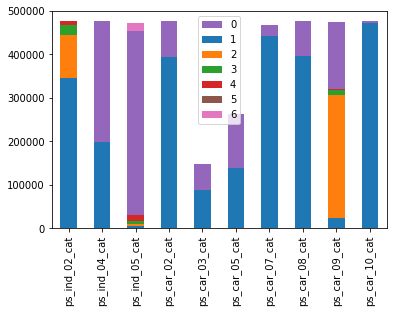

In [11]:
# select categorical variables
cats = meta[(meta.attr_type == 'nominal') & meta.is_data].index
# these attributes have too many values, deal with them separately (TODO)
cats = cats.drop(['ps_car_04_cat', 'ps_car_01_cat', 'ps_car_06_cat', 'ps_car_11_cat'])

# TODO: see if the class values can also be displayed in plot
df = pd.DataFrame()

for col in cats:
	counts: pd.Series = train[col].value_counts() # get counts for each value
	if counts.__contains__(-1): # don't include NAs
		counts = counts.drop([-1])

	# print(counts); print() # print table of counts
	print("{} has {} values".format(col, len(counts)))
	df = df.append(counts)

ax = df.plot.bar(stacked=True)
# for some reason the legend is order 1, 2, 3, 4, 0, 5, 6
# so rearrange it into the correct order
handles, labels = ax.get_legend_handles_labels()
handles = [handles[4], handles[0], handles[1], handles[2], handles[3], handles[5], handles[6]]
labels = [labels[4], labels[0], labels[1], labels[2], labels[3], labels[5], labels[6]]
ax.legend(handles, labels)


# TODO now do it again for the excluded attributes
cats = ['ps_car_04_cat', 'ps_car_01_cat', 'ps_car_06_cat'] # 10-18 values
last_cat = 'ps_car_11_cat' # 104 values


# Correlation
Generic correlation plotter method

In [27]:
def corrplot(cols):
	corrs = train[cols].corr()
	color_map = sns.diverging_palette(220, 10, as_cmap=True)
	
	fig, ax = plt.subplots(figsize=(10, 10))
	sns.heatmap(corrs, cmap=color_map, vmax=1, center = 0, fmt='.2f', square=True,
				linewidths=0.5, annot=True)
	plt.show()

## Float values

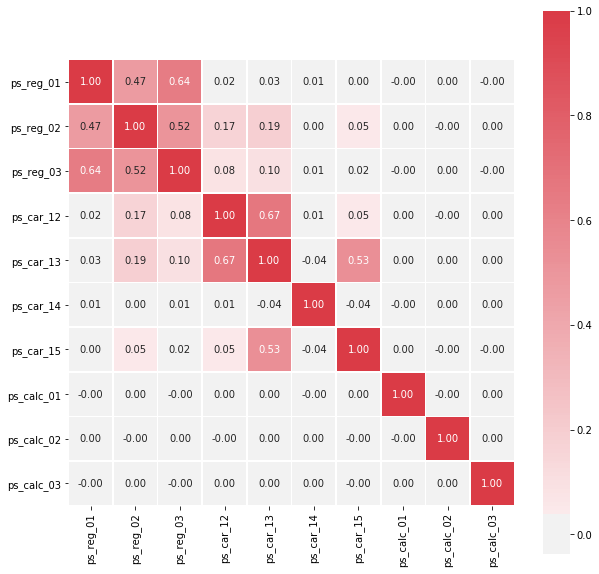

In [28]:
corrplot(meta[(meta.attr_type == 'interval') & meta.is_data].index)

The following significant correlations exist:
- ps_reg_01 and ps_reg_02: 0.47
- ps_reg_02 and ps_reg_03: 0.52
- ps_car_13 and ps_car_15: 0.53
- ps_reg_01 and ps_reg_03: 0.64
- ps_car_12 and ps_car_13: 0.67

\# TODO: analyze correlated variables

# Ordinal values

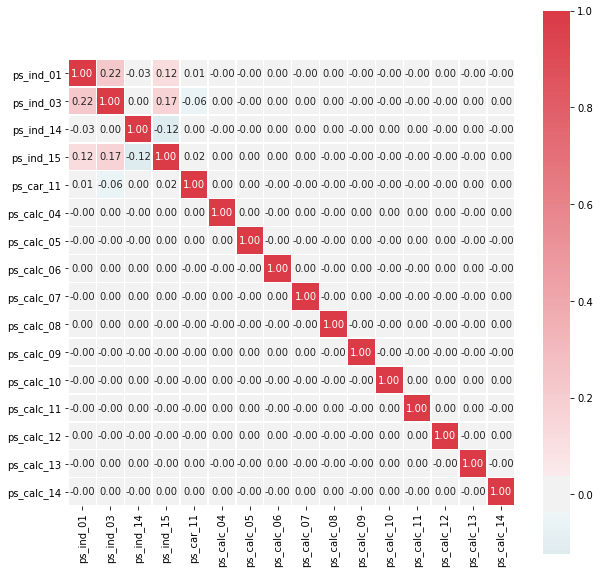

In [30]:
corrplot(meta[(meta.attr_type == 'ordinal') & meta.is_data].index)

There is almost no correlation between any ordinal attributes.